# Global Imports

In [3]:
import numpy as np
from qiskit.circuit.library import TwoLocal
import networkx as nx

# Local Imports

In [4]:
from hamiltonians import gen_maxcut_op, get_exact_ground, gen_maxcut_op_from_graph
from mub_state_gen import generate_all_subsets
from landscape import calculate_energy_landscape, find_k_best_results
from graphing import display_energy_landscape, display_energy_histogram
from vqe import Parameters, get_standard_params, run_vqe_experiment

# Example Experiment

In [5]:
n_qubits = 4
n_mub_qubits = 3
edges = [(0, 1), (0, 2), (0, 3), (1, 2), (2, 3)]
op = gen_maxcut_op(n_qubits, edges)
ansatz = TwoLocal(n_qubits, 'ry', 'cx', 'linear', reps=2, insert_barriers=True).decompose()
zeroset_anastz = ansatz.assign_parameters([0.0]*ansatz.num_parameters)
print(zeroset_anastz)
print(f"attempting all MUB states over the operator {op}")
results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits), appended_ansatz=zeroset_anastz)
exact_result = get_exact_ground(op)
print(exact_result)



     ┌───────┐ ░                 ░ ┌───────┐ ░                 ░ ┌───────┐
q_0: ┤ Ry(0) ├─░───■─────────────░─┤ Ry(0) ├─░───■─────────────░─┤ Ry(0) ├
     ├───────┤ ░ ┌─┴─┐           ░ ├───────┤ ░ ┌─┴─┐           ░ ├───────┤
q_1: ┤ Ry(0) ├─░─┤ X ├──■────────░─┤ Ry(0) ├─░─┤ X ├──■────────░─┤ Ry(0) ├
     ├───────┤ ░ └───┘┌─┴─┐      ░ ├───────┤ ░ └───┘┌─┴─┐      ░ ├───────┤
q_2: ┤ Ry(0) ├─░──────┤ X ├──■───░─┤ Ry(0) ├─░──────┤ X ├──■───░─┤ Ry(0) ├
     ├───────┤ ░      └───┘┌─┴─┐ ░ ├───────┤ ░      └───┘┌─┴─┐ ░ ├───────┤
q_3: ┤ Ry(0) ├─░───────────┤ X ├─░─┤ Ry(0) ├─░───────────┤ X ├─░─┤ Ry(0) ├
     └───────┘ ░           └───┘ ░ └───────┘ ░           └───┘ ░ └───────┘
attempting all MUB states over the operator SparsePauliOp(['IIZZ', 'IZIZ', 'ZIIZ', 'IZZI', 'ZZII', 'IIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j, -2.5+0.j])
-4.0


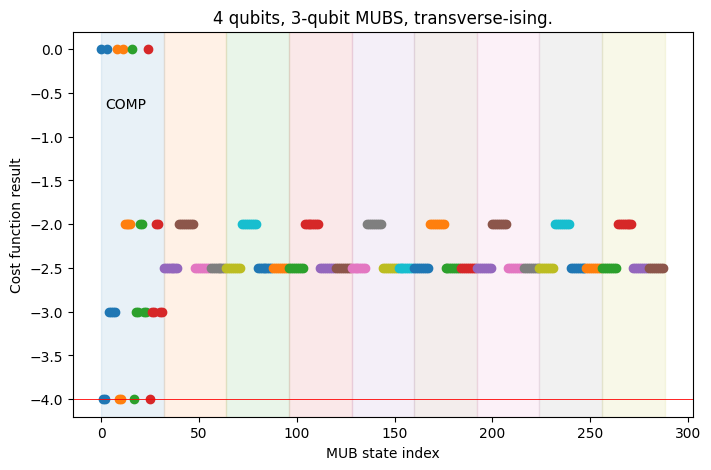

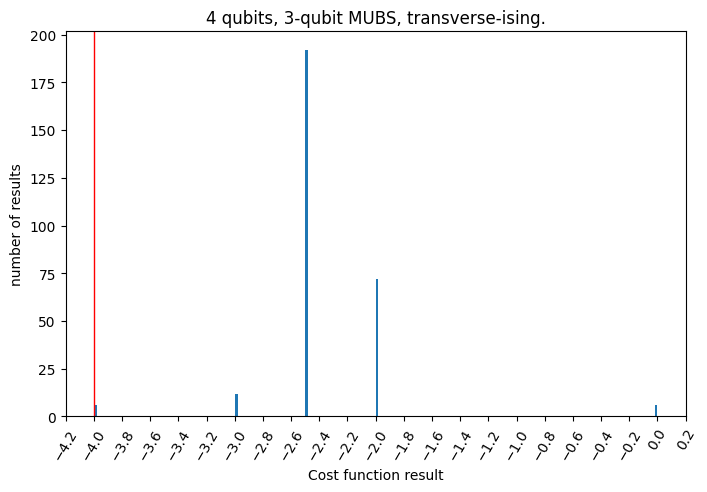

In [6]:
display_energy_landscape(results, exact_result, graph_title=f"{n_qubits} qubits, {n_mub_qubits}-qubit MUBS, transverse-ising.")
display_energy_histogram(results, exact_result, graph_title=f"{n_qubits} qubits, {n_mub_qubits}-qubit MUBS, transverse-ising.", bins=200)

## Combined Example with VQE

Energy Landscape:


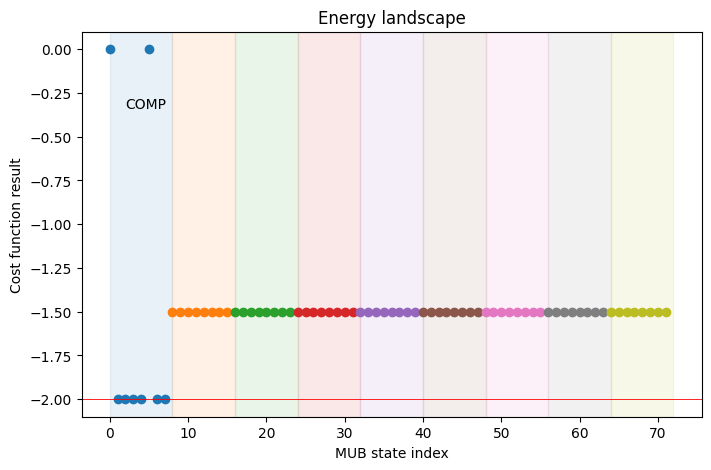

Energy Histogram:


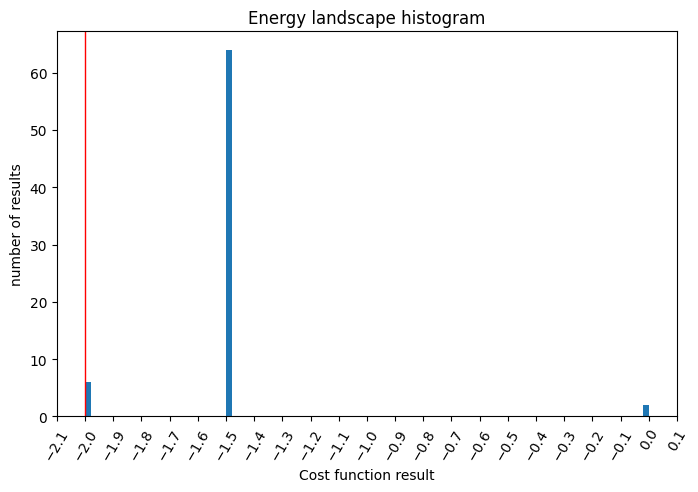

The operator SparsePauliOp(['IZZ', 'ZIZ', 'ZZI', 'III'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j, -1.5+0.j]) has the exact value -2.0.
Now trying to reach the vcalue from different MUB points.
running from point with value -2.0
WOLOLO!
(1, -2.0, True)
running from point with value -2.0
WOLOLO!
(1, -2.0, True)
running from point with value -2.0
WOLOLO!
(1, -2.0, True)
running from point with value -2.0
WOLOLO!
(1, -2.0, True)
running from point with value -2.0
WOLOLO!
(1, -2.0, True)
running from point with value -2.0
WOLOLO!
(1, -2.0, True)
running from point with value -1.5


Traceback (most recent call last):
  File "/Users/ittayalfassi/Documents/repos/Quantum-exhaustive-search/.venv/lib/python3.12/site-packages/scipy/optimize/_cobyla_py.py", line 281, in calcfc
capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.
Fatal Python error: F2PySwapThreadLocalCallbackPtr: F2PySwapThreadLocalCallbackPtr: PyLong_AsVoidPtr failed
Python runtime state: initialized
    f = sf.fun(x)
        ^^^^^^^^^
  File "/Users/ittayalfassi/Documents/repos/Quantum-exhaustive-search/.venv/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py", line 278, in fun
    self._update_fun()
  File "/Users/ittayalfassi/Documents/repos/Quantum-exhaustive-search/.venv/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py", line 262, in _update_fun
    self._update_fun_impl()
  File "/Users/ittayalfassi/Documents/repos/Quantum-exhaustive-search/.venv/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py", line 163, 

WOLOLO!


: 

In [5]:
# generate operator
n_qubits = 3
n_mub_qubits = 3
edges =[(0,1), (1,2), (2,0)]
op = gen_maxcut_op(n_qubits, edges)
exact_result = get_exact_ground(op)

ansatz = TwoLocal(3, ['rx', 'ry', 'rz'], 'cx', 'linear', reps=3, insert_barriers=True).decompose()
zeroset_anastz = ansatz.assign_parameters([0.0]*ansatz.num_parameters)

# calculate landscape and graphs
results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits), appended_ansatz=zeroset_anastz)
exact_result = get_exact_ground(op)
print("Energy Landscape:")
display_energy_landscape(results, exact_result=exact_result)
print("Energy Histogram:")
display_energy_histogram(results, exact_result=exact_result)

# run VQE from the best 5 examples
params = get_standard_params(n_qubits)
params.success_bound = 1e-2
params.exact_result = exact_result
params.optimizer = 'COBYLA'
params.report_period=100
params.report_thetas=False

print(f"The operator {op} has the exact value {params.exact_result}.")
print(f"Now trying to reach the vcalue from different MUB points.")
for initial_state, value in find_k_best_results(results, 10):
    print(f"running from point with value {value}")
    try:
        print(run_vqe_experiment(op, ansatz, initial_state, params))
    except:
        print("AAAAAAAAAAAAAAAA")
    

### 5-8 qubit experiments

Energy Landscape:


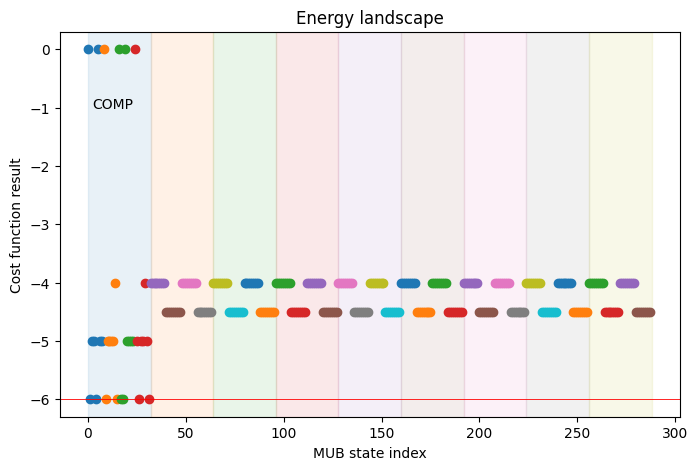

Energy Histogram:


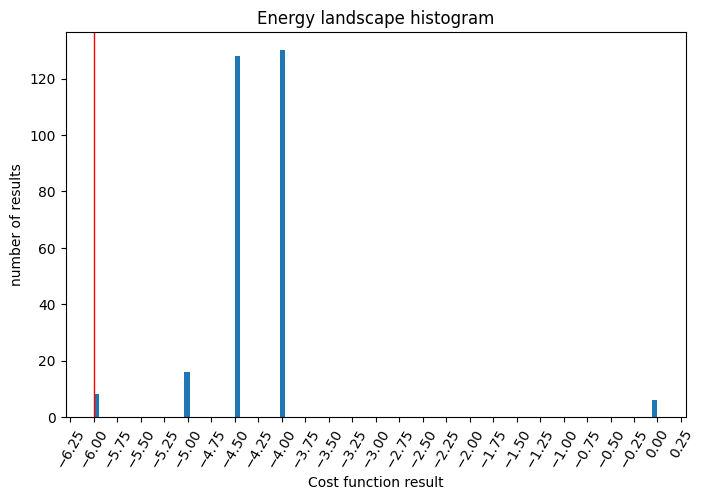

The operator SparsePauliOp(['IIIZZ', 'IIZIZ', 'IZIIZ', 'ZIIIZ', 'IIZZI', 'IZIZI', 'IZZII', 'ZIZII', 'ZZIII', 'IIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j, -4.5+0.j]) has the exact value -6.0.
Now trying to reach the vcalue from different MUB points.
running from point with value -6.0
WOLOLO!
(1, -6.0, True)
running from point with value -6.0
WOLOLO!
(1, -6.0, True)
running from point with value -6.0
WOLOLO!
(1, -6.0, True)
running from point with value -6.0
WOLOLO!
(1, -6.0, True)
running from point with value -6.0
WOLOLO!
(1, -6.0, True)
Energy Landscape:


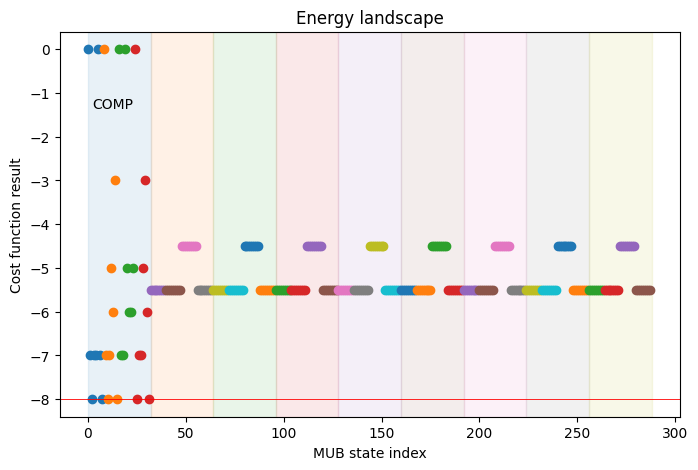

Energy Histogram:


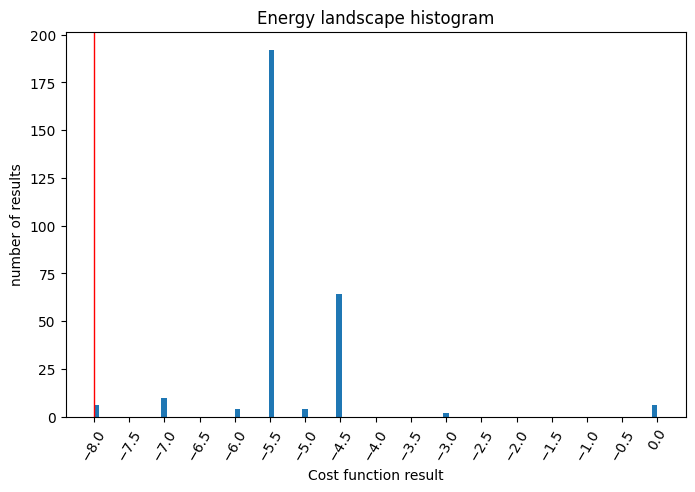

The operator SparsePauliOp(['IIIIZZ', 'IIIZIZ', 'ZIIIIZ', 'IIIZZI', 'IIZIZI', 'IZIIZI', 'ZIIIZI', 'IZIZII', 'ZIIZII', 'IZZIII', 'ZIZIII', 'ZZIIII', 'IIIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j, -6. +0.j]) has the exact value -8.0.
Now trying to reach the vcalue from different MUB points.
running from point with value -8.0
WOLOLO!
(1, -8.0, True)
running from point with value -8.0
WOLOLO!
(1, -8.0, True)
running from point with value -8.0
WOLOLO!
(1, -8.0, True)
running from point with value -8.0
WOLOLO!
(1, -8.0, True)
running from point with value -8.0
WOLOLO!
(1, -8.0, True)
Energy Landscape:


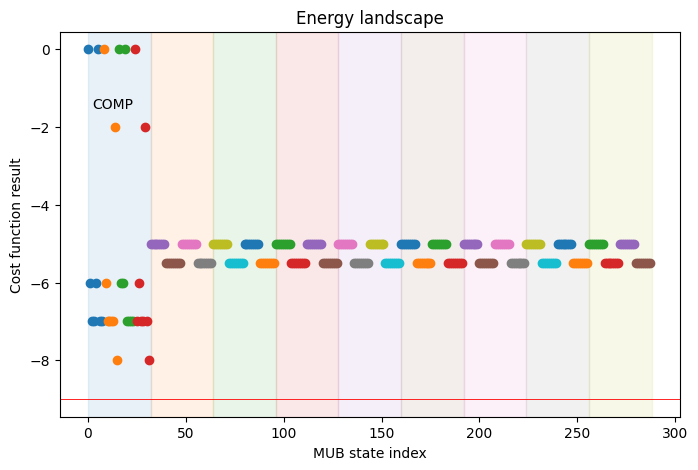

Energy Histogram:


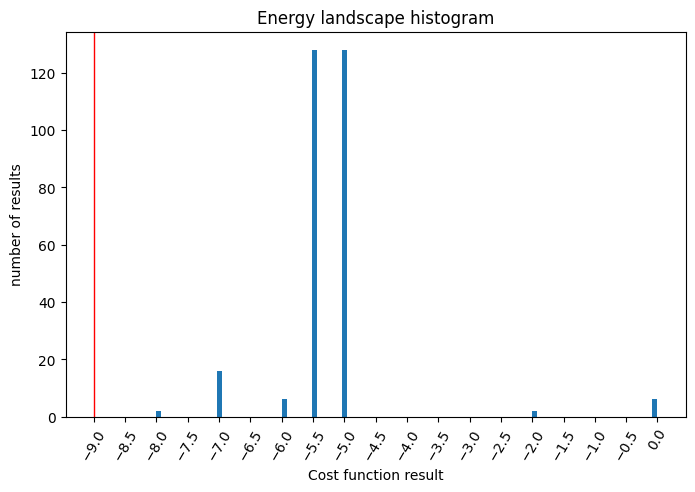

The operator SparsePauliOp(['IIZIIIZ', 'IZIIIIZ', 'IIZIIZI', 'IZIIIZI', 'ZIIIIZI', 'IIIZZII', 'IIZIZII', 'IZIIZII', 'IZIZIII', 'IZZIIII', 'ZIZIIII', 'ZZIIIII', 'IIIIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j, -6. +0.j]) has the exact value -9.0.
Now trying to reach the vcalue from different MUB points.
running from point with value -8.0
100: -8.31295797157017
200: -8.442163810376918
300: -8.560205277788286
400: -8.624618259557128
500: -8.691349845991256
600: -8.735722399696707
700: -8.760048230731702
800: -8.83020708732354
900: -8.858924111328427
1000: -8.920698463952965
(1000, -8.920703948811925, False)
running from point with value -8.0
100: -8.31295797157017
200: -8.43779226343408
300: -8.561228376817951
400: -8.61658008356087
500: -8.645357048816084
600: -8.634045138551459
700: -8.692557283655523
800: -8.740829623592273
900: -8.881288204235942
1000: -8.952974318009177
(1000, -8

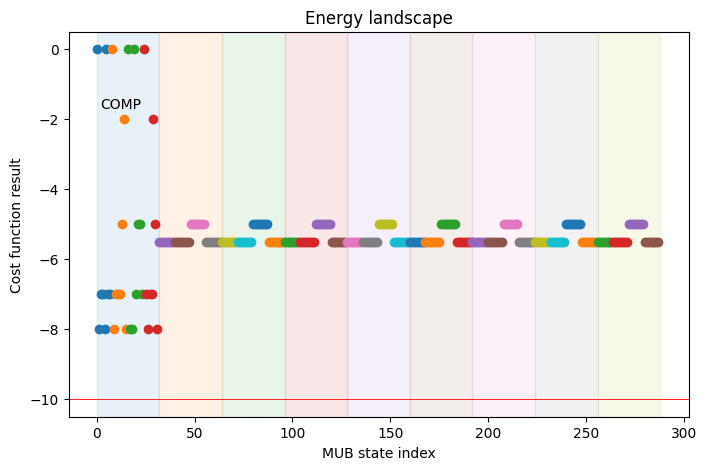

Energy Histogram:


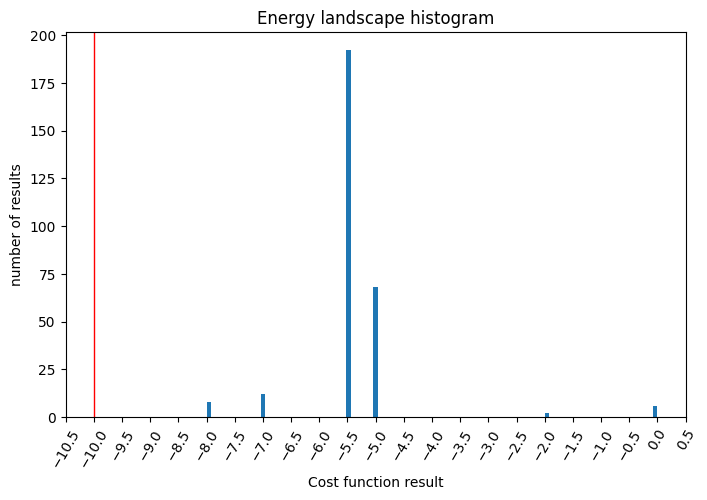

The operator SparsePauliOp(['IIIIZIIZ', 'IIZIIIIZ', 'IIZIIIZI', 'IIIZIZII', 'IIZIIZII', 'IZIIIZII', 'ZIIIIZII', 'IIIZZIII', 'IIZIZIII', 'IZIIZIII', 'ZIIIZIII', 'IZIZIIII', 'ZIIZIIII', 'ZIZIIIII', 'IIIIIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
 -7. +0.j]) has the exact value -10.0.
Now trying to reach the vcalue from different MUB points.
running from point with value -8.0
100: -8.312311103361957
200: -9.204352977783465
300: -9.300830520221687
400: -9.358942016501686
500: -9.544086361603824
600: -9.635141400131143
700: -9.821923888529348
800: -9.865086564095892
900: -9.905118527403674
1000: -9.959354274878287
(1000, -9.959427289349973, False)
running from point with value -8.0
100: -8.404581443227338
200: -8.760974172227595
300: -9.408930529365751
400: -9.410151785470841
500: -9.406890036664578
600: -9.518336202978546
700: -9.590806729306411
800: -9.8295215137

In [7]:
rand_graph_5 = nx.gnm_random_graph(5, 9)
rand_graph_6 = nx.gnm_random_graph(6, 12)
rand_graph_7 = nx.gnm_random_graph(7, 12)
rand_graph_8 = nx.gnm_random_graph(8, 14)
graphs = [rand_graph_5, rand_graph_6, rand_graph_7, rand_graph_8]

for graph in graphs:
    op = gen_maxcut_op_from_graph(graph)
    exact_result = get_exact_ground(op)

    ansatz = TwoLocal(op.num_qubits, ['rx', 'ry', 'rz'], 'cx', 'linear', reps=3, insert_barriers=True).decompose()
    zeroset_anastz = ansatz.assign_parameters([0.0]*ansatz.num_parameters)

    # calculate landscape and graphs
    results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits), appended_ansatz=zeroset_anastz)
    exact_result = get_exact_ground(op)
    print("Energy Landscape:")
    display_energy_landscape(results, exact_result=exact_result)
    print("Energy Histogram:")
    display_energy_histogram(results, exact_result=exact_result)

    # run VQE from the best 5 examples
    params = get_standard_params(n_qubits)
    params.success_bound = 1e-2
    params.exact_result = exact_result
    params.optimizer = 'COBYLA'
    params.report_period=100
    params.report_thetas=False

    print(f"The operator {op} has the exact value {params.exact_result}.")
    print(f"Now trying to reach the vcalue from different MUB points.")
    for initial_state, value in find_k_best_results(results, 5):
        print(f"running from point with value {value}")
        print(run_vqe_experiment(op, ansatz, initial_state, params))
    

## Conclusions from the current set of experiments

1. In maxcut, going from a non-ideal state to an ideal state takes a considerable amount of steps.
2. Not necessarily because of a barren plateau - could just be that the optimizer step size was small.
3. To gain clearer insights, we need longer experiments and a clearer indication of progress other than "couldn't reach the goal".